 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Describe whale returns
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()




C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\1777882813.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates = True, infer_datetime_format = True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)


C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\647379459.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates = True, infer_datetime_format = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sptsx_csv = Path("Resources/sp_tsx_history.csv")
sptsx = pd.read_csv(sptsx_csv, index_col="Date", parse_dates = True, infer_datetime_format = True)
sptsx.sort_index(ascending = True)
sptsx.head()

C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\2261210377.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sptsx = pd.read_csv(sptsx_csv, index_col="Date", parse_dates = True, infer_datetime_format = True)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sptsx.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types

sptsx["Close"]=sptsx["Close"].str.replace('$','')

sptsx["Close"]=sptsx["Close"].str.replace(',','')

sptsx["Close"]=sptsx["Close"].astype("float")

sptsx.sort_index(inplace = True)

sptsx




,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [11]:
# Calculate Daily Returns
sptsx_daily_returns = sptsx.pct_change()

In [12]:
# Drop nulls
sptsx_daily_returns.dropna(inplace = True)
sptsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily_returns.rename(columns = {"Close":"sptsx"}, inplace = True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns, sptsx_daily_returns], axis = "columns", join = "inner")
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sptsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [15]:
df_daily.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sptsx                          0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

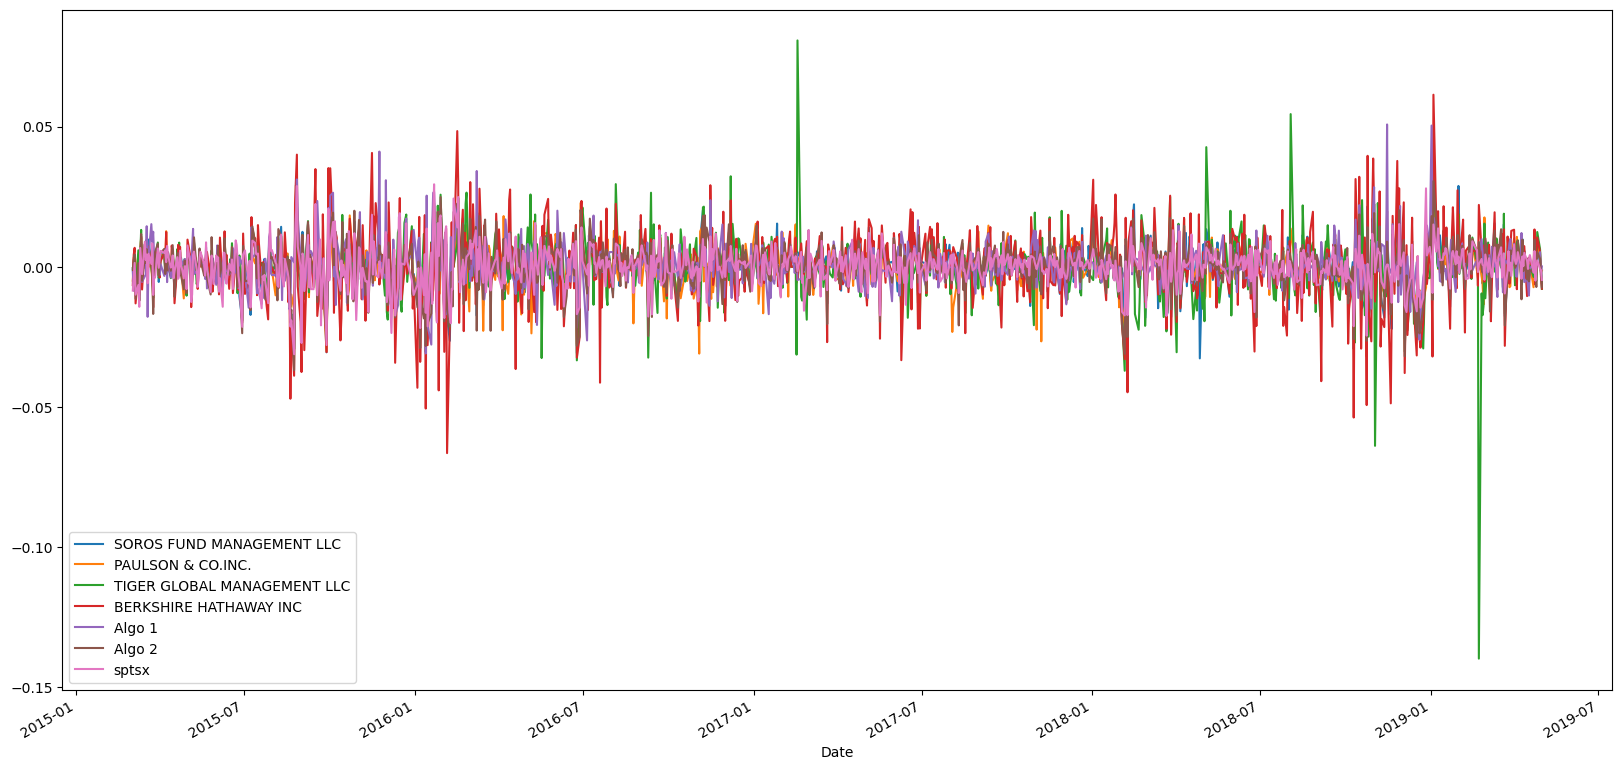

In [16]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

In [17]:
df_daily.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
sptsx                          float64
dtype: object

<Axes: xlabel='Date'>

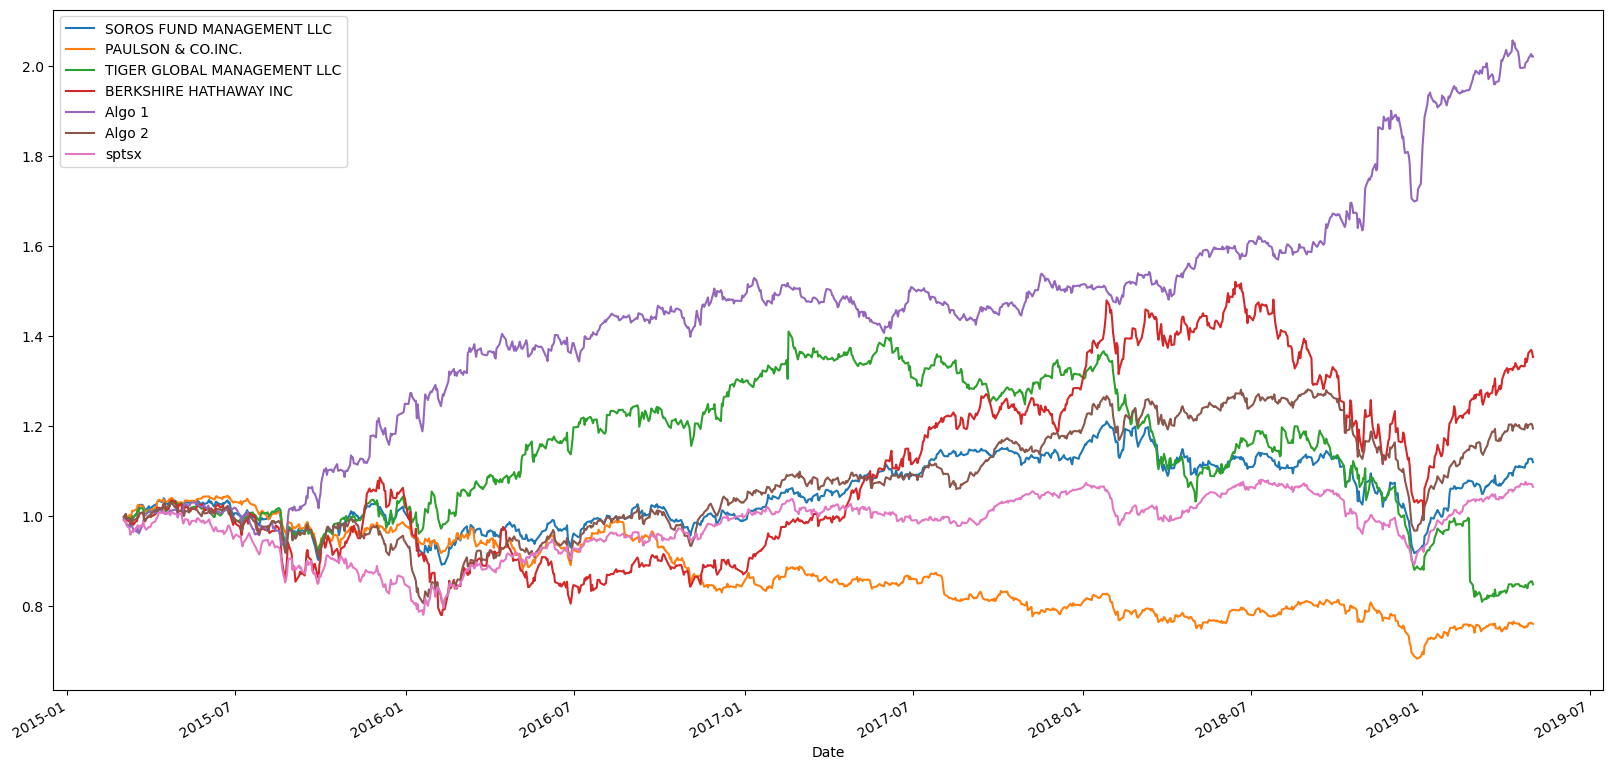

In [18]:
# Calculate cumulative returns of all portfolios
df_cum = (1 + df_daily).cumprod()
# Plot cumulative returns
df_cum.plot(figsize = (20,10))



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

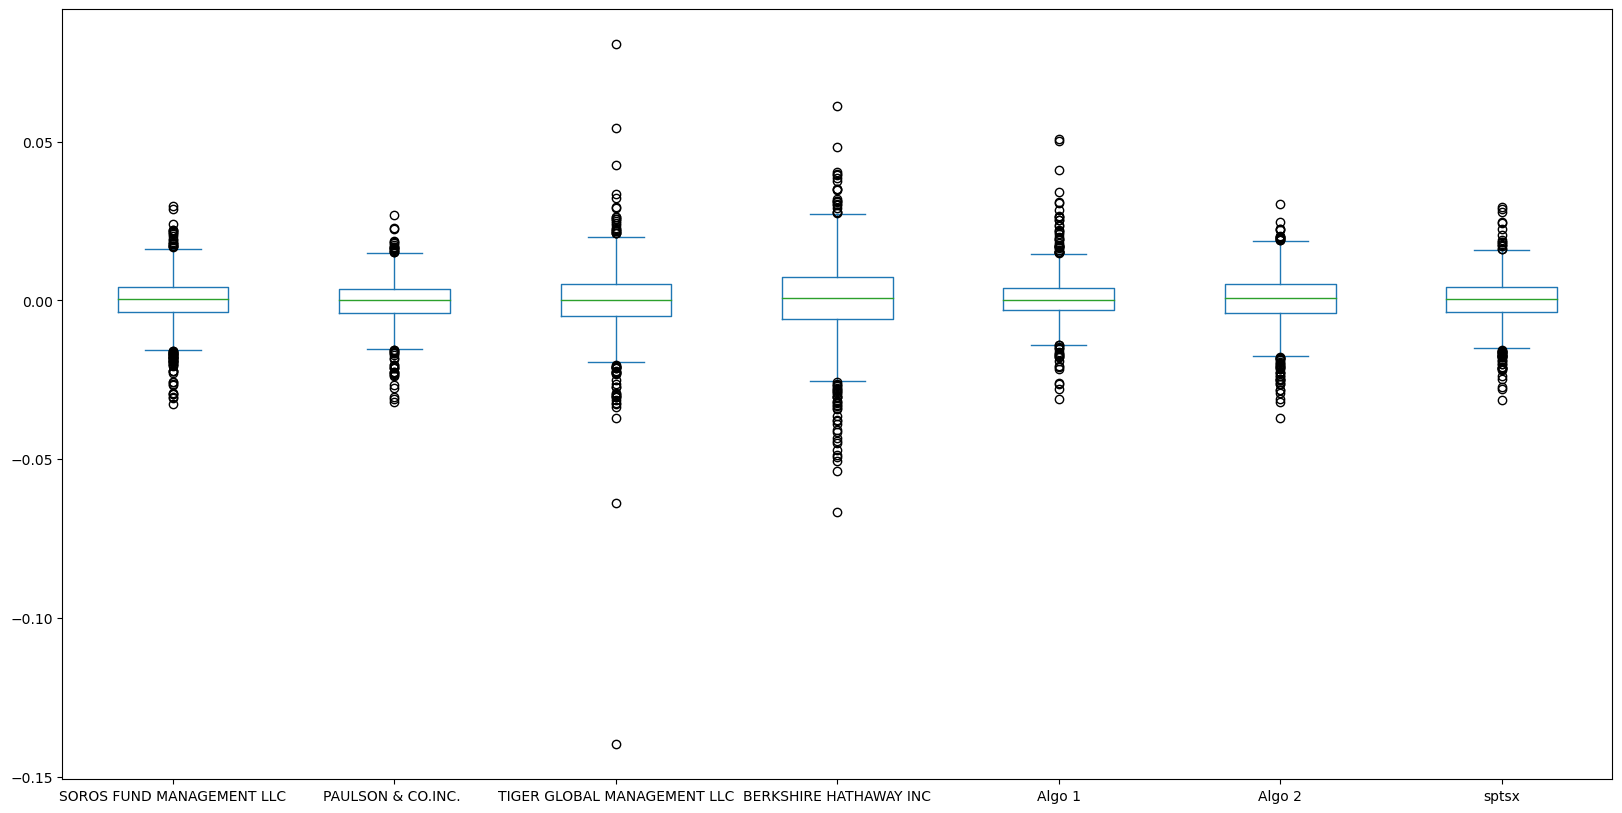

In [19]:
# Box plot to visually show risk
df_daily.plot(kind = 'box', figsize = (20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:'std'})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
sptsx,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
high_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sptsx", "std"]]
                        
# Determine which portfolios are riskier than the S&P TSX 60
high_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std.head()

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

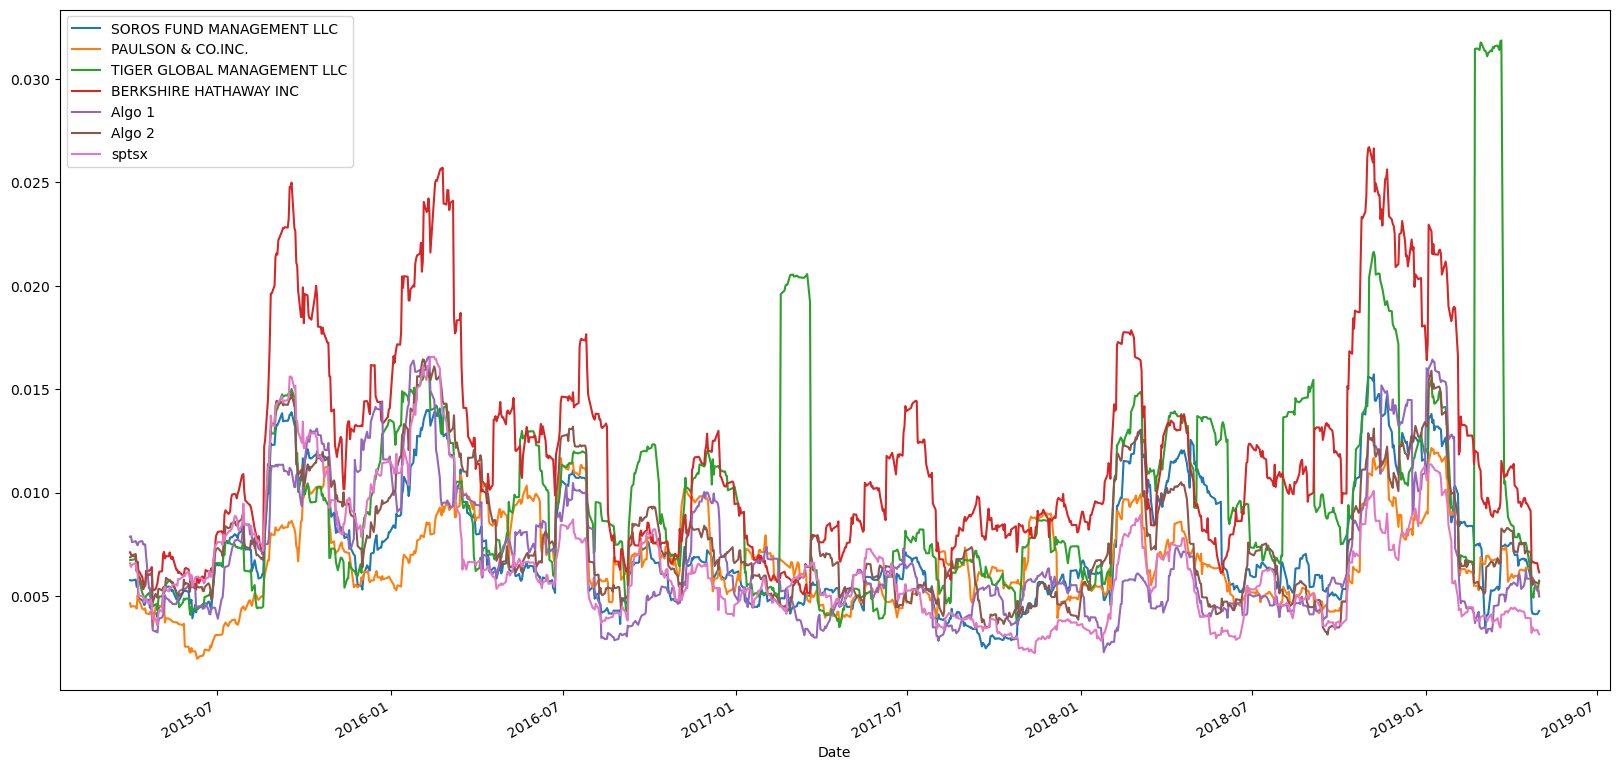

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_daily_rolling_21 = df_daily.rolling(window = 21).std()


# Plot the rolling standard deviation
df_daily_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

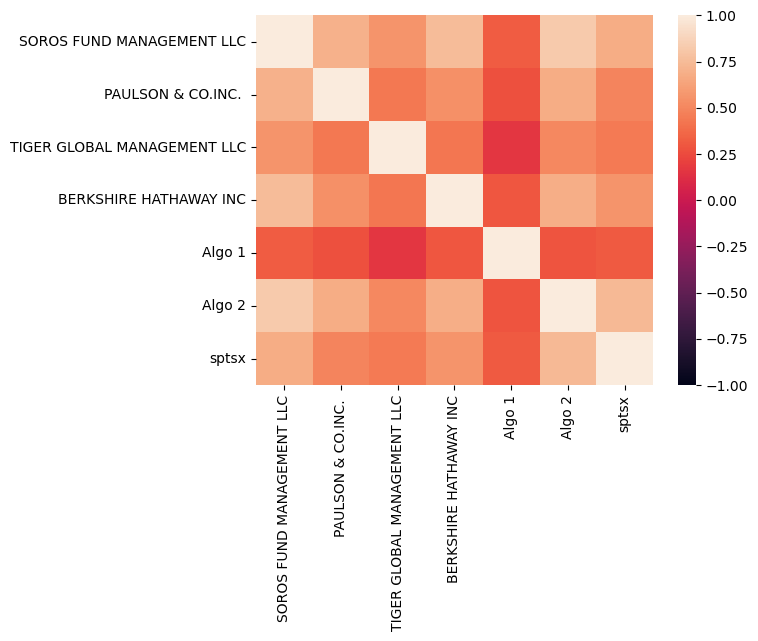

In [24]:
# Calculate the correlation
correlation_df_daily = pd.DataFrame(df_daily.corr())
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_df_daily, vmin=-1, vmax=1)

df_daily.plot

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of Algo 2'}, xlabel='Date'>

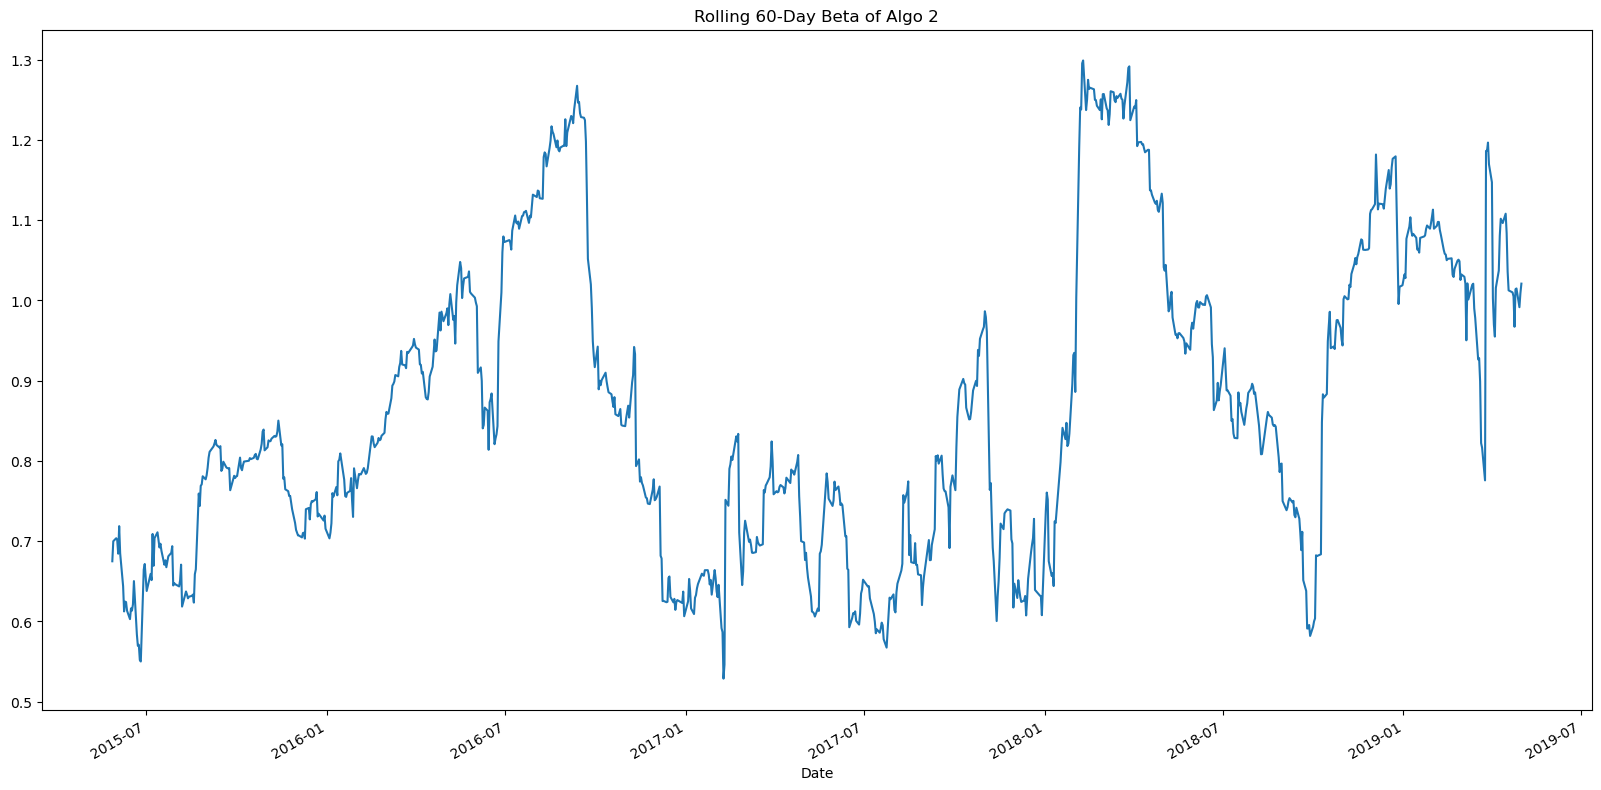

In [25]:
# Calculate covariance of a single portfolio
covariance = df_daily['Algo 2'].rolling(window=60).cov(df_daily['sptsx'])
# Calculate variance of S&P TSX
variance = df_daily['sptsx'].rolling(window=60).var()

# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title = 'Rolling 60-Day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

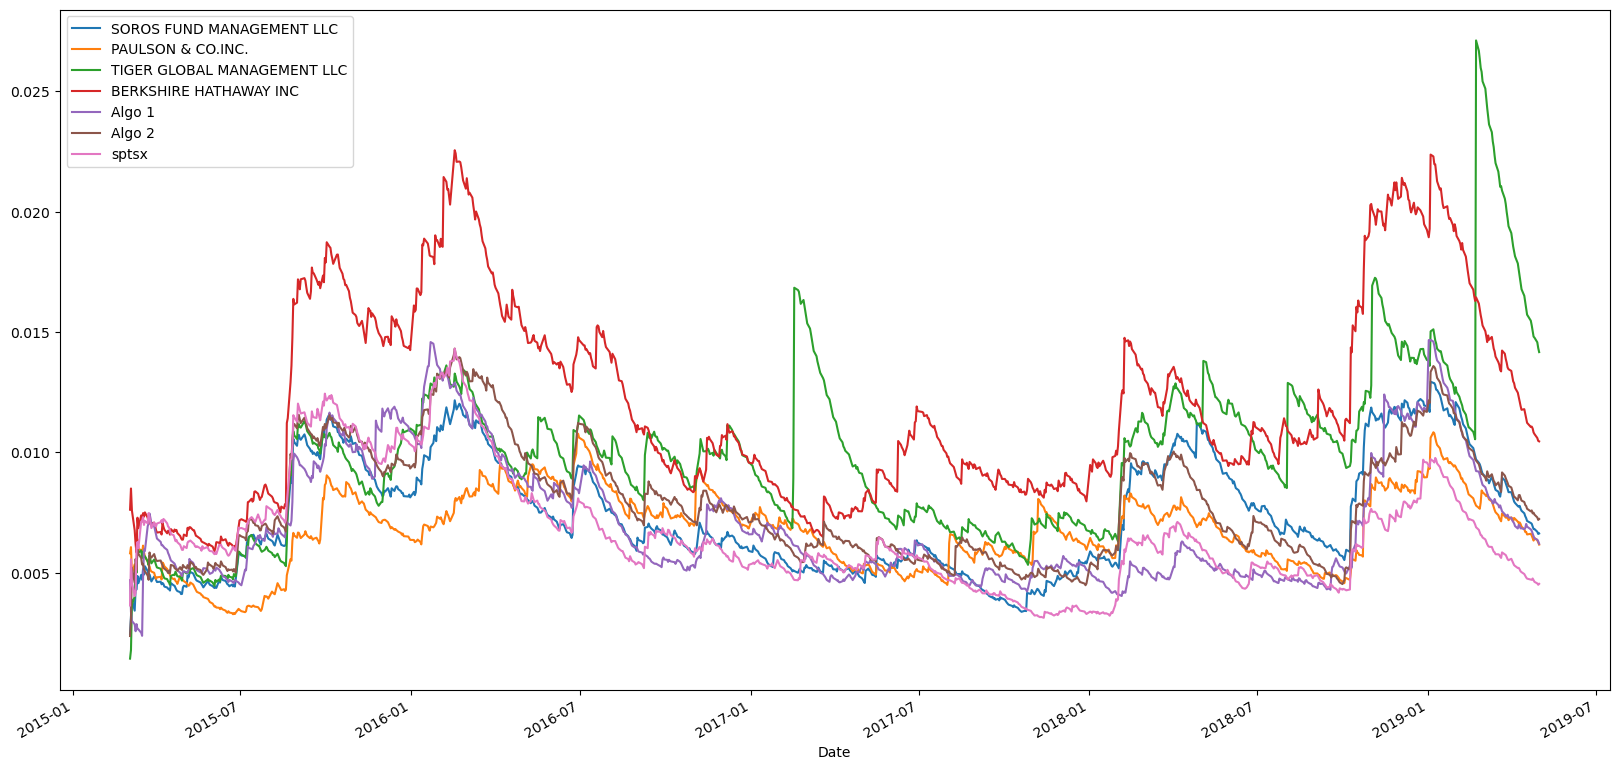

In [26]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(halflife = 21,adjust = False).std()
(df_daily_ewm).plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sptsx                          0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

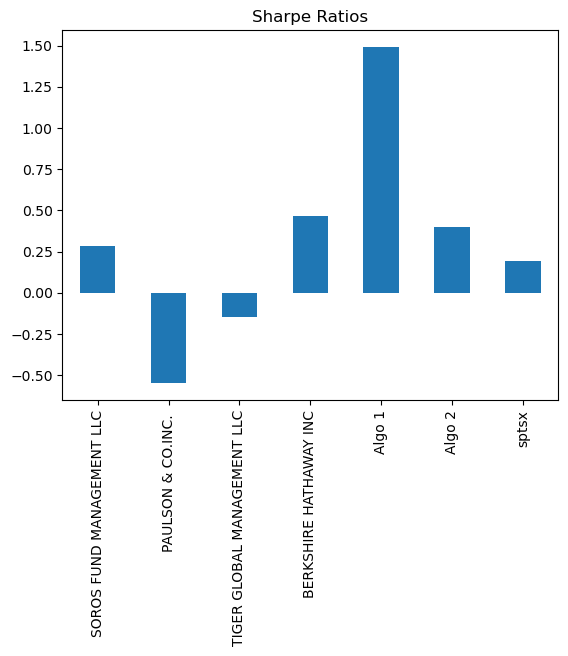

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
"Algo 1 significantly out performed the market while algo 2 lost to Berkshire Hathaway but ourperformed compared to the rest of the portfolios such as sptsx, soros, paulson and tiger global."

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
l_historical = pd.read_csv(Path("Resources/l_historical.csv"), index_col = "Date",
                           parse_dates = True, infer_datetime_format = True)
l_historical.rename(columns = {"Close":"L_price"}, inplace = True)
l_historical.drop(columns = {"Symbol"}, inplace = True)
l_historical.head()
                        
                

C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\3635477908.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  l_historical = pd.read_csv(Path("Resources/l_historical.csv"), index_col = "Date",


,L_price
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [30]:
# Reading data from 2nd stock
otex_historical = pd.read_csv(Path("Resources/otex_historical.csv"), index_col = "Date",
                              parse_dates = True, infer_datetime_format = True)
otex_historical.rename(columns = {"Close":"OTEX_price"}, inplace = True)
otex_historical.drop(columns = {"Symbol"}, inplace = True)
otex_historical.head()

C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\3210552617.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  otex_historical = pd.read_csv(Path("Resources/otex_historical.csv"), index_col = "Date",


,OTEX_price
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [31]:
# Reading data from 3rd stock
shop_historical = pd.read_csv(Path("Resources/shop_historical.csv"), index_col = "Date",
                              parse_dates = True, infer_datetime_format = True)
shop_historical.rename(columns = {"Close":"SHOP_price"}, inplace = True)
shop_historical.drop(columns = {"Symbol"}, inplace = True)
shop_historical.head()

C:\Users\KerryZhang\AppData\Local\Temp\ipykernel_17356\289011630.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  shop_historical = pd.read_csv(Path("Resources/shop_historical.csv"), index_col = "Date",


,SHOP_price
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [32]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((l_historical, otex_historical, shop_historical), axis = 1, join = 'inner')
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()

,L_price,OTEX_price,SHOP_price
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [33]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [34]:
# Reorganize portfolio data by having a column per symbol
## Has already been done as seen above

In [35]:
# Calculate daily returns
all_stocks_returns = all_stocks.pct_change()
# Drop NAs
all_stocks_returns.dropna(inplace = True)
# Display sample data
all_stocks_returns.head()

,L_price,OTEX_price,SHOP_price
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_stocks_returns['My Portfolio'] = all_stocks_returns.dot(weights)
# Display sample data
all_stocks_returns.head()

,L_price,OTEX_price,SHOP_price,My Portfolio
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
all_stocks_weighted = pd.concat((all_stocks_returns, df_daily), axis = 1, join = 'inner')
all_stocks_weighted

,L_price,OTEX_price,SHOP_price,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sptsx
Date,,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000174,-0.003715,0.017092,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003672,0.000773,0.012628,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002918,-0.006181,0.013173,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stocks_weighted.dropna(inplace = True)
all_stocks_weighted


,L_price,OTEX_price,SHOP_price,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sptsx
Date,,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000174,-0.003715,0.017092,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003672,0.000773,0.012628,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002918,-0.006181,0.013173,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
annual_std = (all_stocks_weighted.std()*np.sqrt(252))
annual_std

L_price                        0.162907
OTEX_price                     0.225703
SHOP_price                     0.504079
My Portfolio                   0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
sptsx                          0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

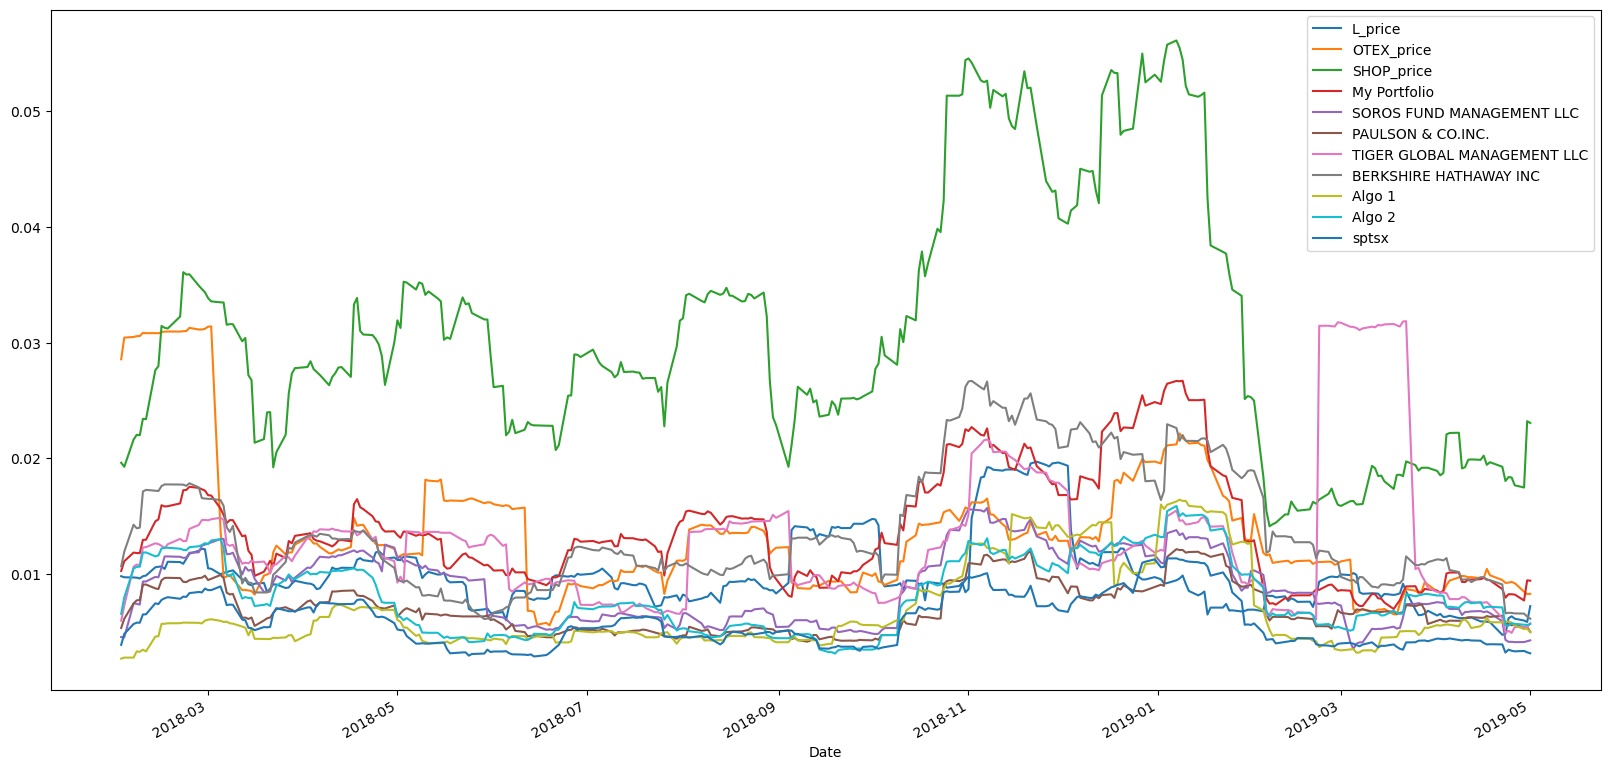

In [40]:
# Calculate rolling standard deviation
annual_std_21 = all_stocks_weighted.rolling(window = 21).std()
# Plot rolling standard deviation
annual_std_21.plot(figsize = (20,10))

### Calculate and plot the correlation

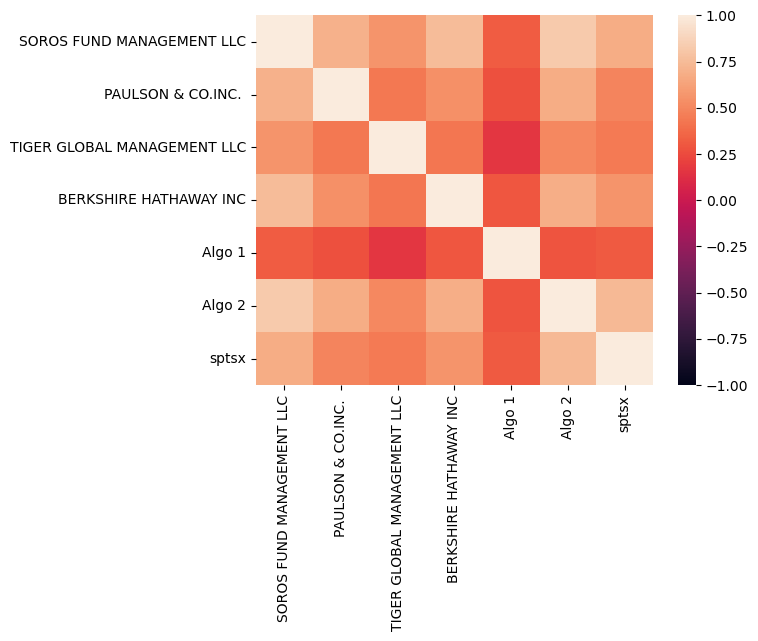

In [41]:
# Calculate and plot the correlation
correlation_annual_std_21 = pd.DataFrame(annual_std_21.corr())
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_df_daily, vmin=-1, vmax=1)

correlation_annual_std_21.plot

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of my Portfolio'}, xlabel='Date'>

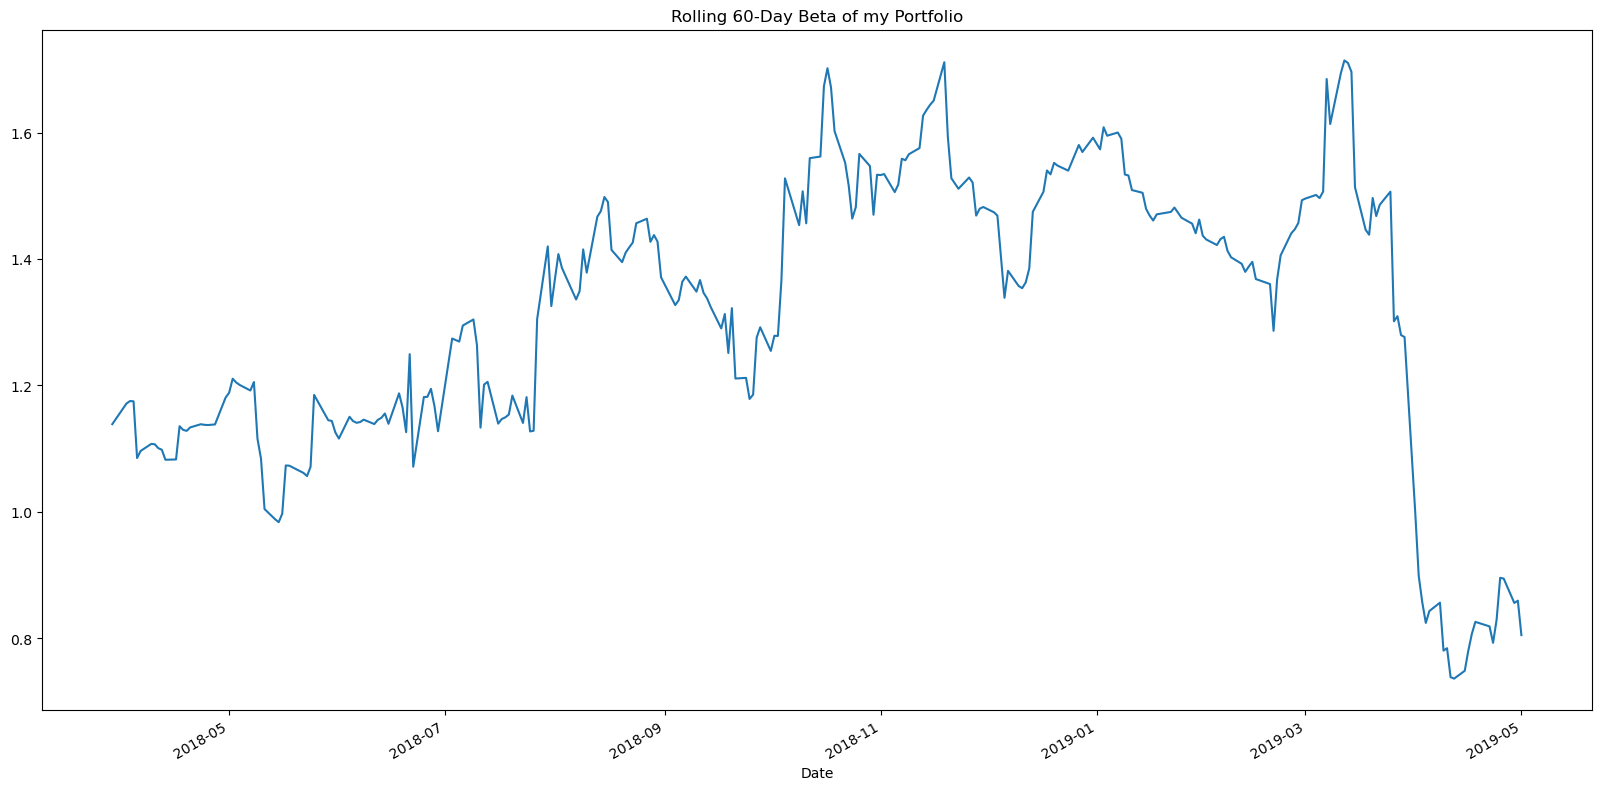

In [42]:

# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = all_stocks_weighted['My Portfolio'].rolling(window=60).cov(all_stocks_weighted['sptsx'])
# Calculate variance of S&P TSX
variance = all_stocks_weighted['sptsx'].rolling(window=60).var()

# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title = 'Rolling 60-Day Beta of my Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = all_stocks_weighted.mean()*252/(all_stocks_weighted.std()*np.sqrt(252))
sharpe_ratio

L_price                        0.532599
OTEX_price                     0.762776
SHOP_price                     1.575294
My Portfolio                   1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
sptsx                          0.034651
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

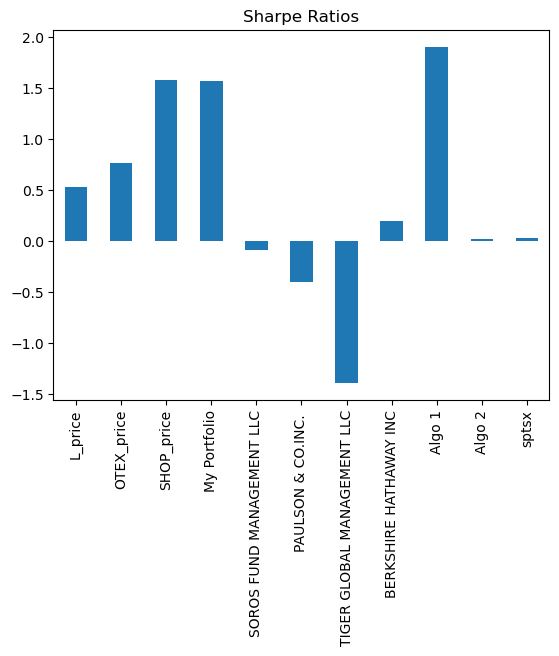

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [45]:
"My Porfolio is identical in performance to shop which means it could be quite correlated and heavily weighted in their products. Compared to algorithm 1 it is still lacking in Alpha"

'My Porfolio is identical in performance to shop which means it could be quite correlated and heavily weighted in their products. Compared to algorithm 1 it is still lacking in Alpha'